In [17]:
import geopandas as gpd
from shapely.geometry import Point
from libpysal.weights import KNN, lat2W
from pysal.explore import esda
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [18]:
data_model = gpd.read_file('data_final.csv')
data_model.head()

,PRICE,CONSTRUCTEDAREA,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,...,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,FLATLOCATIONID_RECATEGORIZED,ROOMNUMBER_RECATEGORIZED,BATHNUMBER_RECATEGORIZED,CADASTRALQUALITYID_RECATEGORIZED
0,373000.0,75,0,0,1,0,0,0,1,0,...,1,0.907479301492356,0.1391088333260195,1.6084440538331333,-3.711570866261,40.4221904507903,1,2,1.0,Calidad Baja
1,284000.0,48,0,1,1,0,0,0,0,0,...,1,0.8454622065065257,0.1442989513147649,1.5161658206285225,-3.71043986942694,40.4222514604856,0,1,1.0,Calidad Media
2,228000.0,50,0,0,0,0,0,0,0,0,...,1,1.2502312819626926,0.3370982409358278,1.7941363317581025,-3.71434022421324,40.4087408924555,1,0,1.0,Calidad Alta
3,225000.0,35,0,1,0,0,0,0,0,0,...,1,0.8595652047411976,0.1269945271222577,1.5174370199735303,-3.71039480572019,40.4224499360928,0,0,1.0,Calidad Baja
4,365000.0,100,1,1,0,0,0,0,0,0,...,1,1.3461152571121138,0.2634451780873044,1.7629217131027126,-3.71412579045626,40.4074088773041,1,2,1.0,Calidad Media


In [19]:
data_model['geometry'] = data_model.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
data_model =  gpd.GeoDataFrame(data_model, geometry='geometry', crs = 'EPSG:4326')
data_model.head()

,PRICE,CONSTRUCTEDAREA,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,...,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,FLATLOCATIONID_RECATEGORIZED,ROOMNUMBER_RECATEGORIZED,BATHNUMBER_RECATEGORIZED,CADASTRALQUALITYID_RECATEGORIZED,geometry
0,373000.0,75,0,0,1,0,0,0,1,0,...,0.907479301492356,0.1391088333260195,1.6084440538331333,-3.711570866261,40.4221904507903,1,2,1.0,Calidad Baja,POINT (-3.71157 40.42219)
1,284000.0,48,0,1,1,0,0,0,0,0,...,0.8454622065065257,0.1442989513147649,1.5161658206285225,-3.71043986942694,40.4222514604856,0,1,1.0,Calidad Media,POINT (-3.71044 40.42225)
2,228000.0,50,0,0,0,0,0,0,0,0,...,1.2502312819626926,0.3370982409358278,1.7941363317581025,-3.71434022421324,40.4087408924555,1,0,1.0,Calidad Alta,POINT (-3.71434 40.40874)
3,225000.0,35,0,1,0,0,0,0,0,0,...,0.8595652047411976,0.1269945271222577,1.5174370199735303,-3.71039480572019,40.4224499360928,0,0,1.0,Calidad Baja,POINT (-3.71039 40.42245)
4,365000.0,100,1,1,0,0,0,0,0,0,...,1.3461152571121138,0.2634451780873044,1.7629217131027126,-3.71412579045626,40.4074088773041,1,2,1.0,Calidad Media,POINT (-3.71413 40.40741)


In [20]:
# Definir solo 20 vecinos más cercanos en lugar de usar un radio
w = KNN.from_dataframe(data_model, k=20)
w.transform = "r"

In [21]:
data_model['PRICE'] = pd.to_numeric(data_model['PRICE'], errors='coerce')

In [22]:
# Cálculo del índice de Moran global
moran = esda.Moran(data_model['PRICE'], w)  # Asegúrate de tener la columna de 'PRICE' o el valor que estés analizando

print(f'Índice de Moran: {moran.I}')
print(f'p-valor: {moran.p_sim}')

Índice de Moran: 0.6254074463035912
p-valor: 0.001


In [23]:
geary = esda.Geary(data_model['PRICE'], w)

print(f'Estadístico de Geary: {geary.C}')
print(f'p-valor: {geary.p_sim}')

Estadístico de Geary: 0.3683502120540603
p-valor: 0.001


In [24]:
# Cálculo del índice de Moran local
lisa = esda.Moran_Local(data_model['PRICE'], w)

# Resultados
print(f"Índice de Moran local: {lisa.Is}")
print(f"p-valor local: {lisa.p_sim}")

Índice de Moran local: [ 0.01007572  0.00941773 -0.07705015 ... -0.93150325  0.57263549
 -0.0034838 ]
p-valor local: [0.446 0.177 0.102 ... 0.001 0.001 0.416]


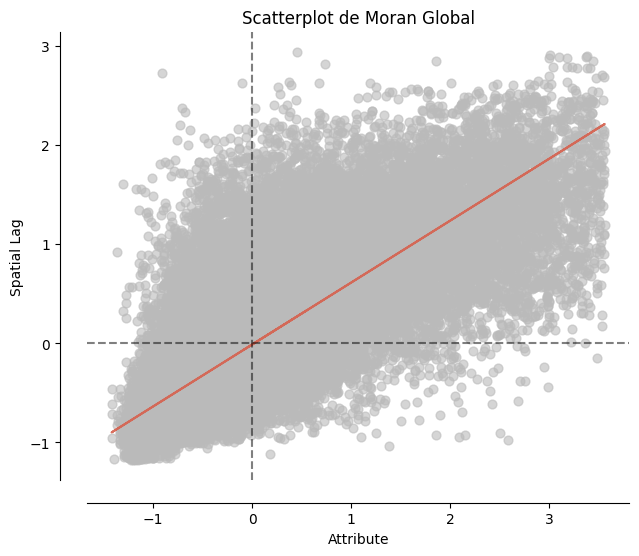

In [25]:
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt
# Scatterplot de Moran global
moran_scatterplot(moran, p=0.05)
plt.title("Scatterplot de Moran Global")
plt.show()

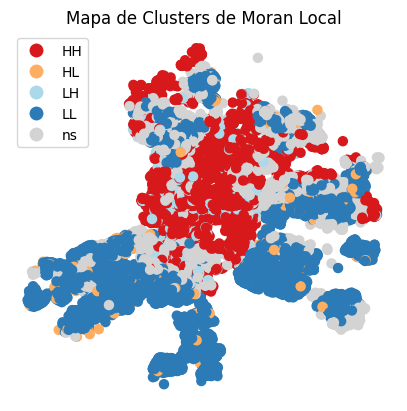

In [26]:
from splot.esda import lisa_cluster

# Mapa de clusters de Moran local
lisa_cluster(lisa, data_model)
plt.title("Mapa de Clusters de Moran Local")
plt.show()

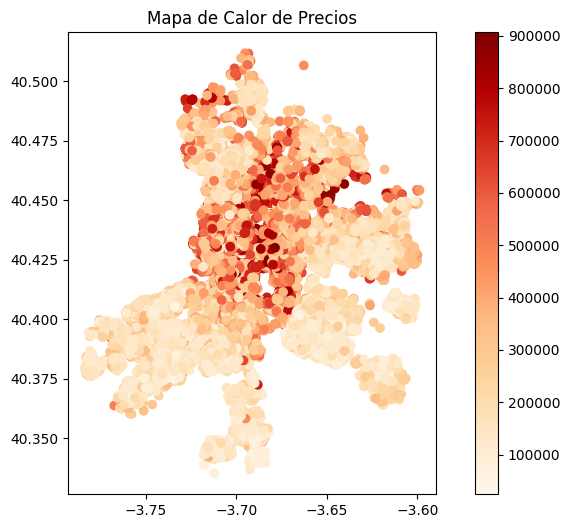

In [27]:
import matplotlib.pyplot as plt

# Mapa de calor de los precios
data_model.plot(column='PRICE', cmap='OrRd', legend=True, figsize=(10, 6))
plt.title("Mapa de Calor de Precios")
plt.show()

In [28]:
from esda.getisord import G

# Prueba de Getis-Ord
g = G(data_model['PRICE'], w)
print(f'Estadístico G de Getis-Ord: {g.G}')
print(f'p-valor: {g.p_sim}')

Estadístico G de Getis-Ord: 0.0005278872061730527
p-valor: 0.001


In [29]:
from esda.moran import Moran_Local

# Prueba de Moran local con permutaciones
lisa = Moran_Local(data_model['PRICE'], w, permutations=9999)
print(f"Índice de Moran local: {lisa.Is}")
print(f"p-valor local: {lisa.p_sim}")

Índice de Moran local: [ 0.01007572  0.00941773 -0.07705015 ... -0.93150325  0.57263549
 -0.0034838 ]
p-valor local: [4.521e-01 1.798e-01 1.022e-01 ... 3.000e-04 1.000e-04 4.094e-01]


In [30]:
# Identificar outliers espaciales
outliers = data_model[lisa.p_sim < 0.05]  # Puntos con p-valor < 0.05
print("Outliers espaciales:")
print(outliers[['LONGITUDE', 'LATITUDE', 'PRICE']])

Outliers espaciales:
               LONGITUDE          LATITUDE     PRICE
4      -3.71412579045626  40.4074088773041  365000.0
5      -3.70954925727831  40.4205091773549  203000.0
6      -3.71225030345416  40.4117267721271  213000.0
7      -3.70909371733758  40.4175389898948  897000.0
8      -3.71116360477662  40.4193370928998  265000.0
...                  ...               ...       ...
47368   -3.6062031839016  40.4318900921067  308000.0
47369  -3.60772369430961   40.441017275681  152000.0
47370  -3.60689442116834  40.4392738795224  242000.0
47371  -3.70368646259124   40.443842332511  107000.0
47372  -3.74026112687974  40.3897849454989  145000.0

[35819 rows x 3 columns]
